<a href="https://colab.research.google.com/github/adenisenko01/cs32project/blob/main/Final_Project_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ds = pd.read_csv('https://raw.githubusercontent.com/adenisenko01/cs32project/main/CS32%20project%20with%20norm%20-%20Sheet1%20(1).csv')
print(ds)

     Age  Gender  Weight  Resting HR  Athletic Goal  Outcome
0     28       1     147          88              2      266
1     45       0     134          87              1      267
2     58       1     183          89              2      333
3     21       1     154          89              1      266
4     53       1     130          92              0      276
..   ...     ...     ...         ...            ...      ...
994   40       0     172          54              2      268
995   41       1     166          84              2      294
996   46       0     145          70              0      261
997   26       0     188          69              2      285
998   30       0     208          83              2      323

[999 rows x 6 columns]


Text(0, 0.5, 'Count')

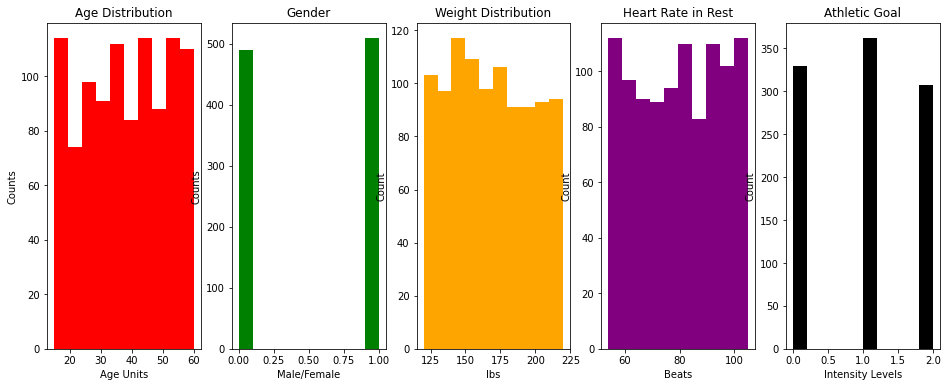

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (16, 6))
axes = ax.ravel()

axes[0].hist(ds['Age'], color = 'red')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age Units')
axes[0].set_ylabel('Counts')
axes[1].hist(ds['Gender'], color = 'green')
axes[1].set_title('Gender')
axes[1].set_xlabel('Male/Female')
axes[1].set_ylabel('Counts')
axes[2].hist(ds['Weight'], color = 'orange')
axes[2].set_title('Weight Distribution')
axes[2].set_xlabel('lbs')
axes[2].set_ylabel('Count')
axes[3].hist(ds['Resting HR'], color = 'purple')
axes[3].set_title('Heart Rate in Rest')
axes[3].set_xlabel('Beats')
axes[3].set_ylabel('Count')
axes[4].hist(ds['Athletic Goal'], color = 'black')
axes[4].set_title('Athletic Goal')
axes[4].set_xlabel('Intensity Levels')
axes[4].set_ylabel('Count')

In [ ]:
# by finding standart deviation of each parameter in the dataset we are able to sort people in different 'classes' and assign them scores.
def std_dev_finder(x):
  mean = np.mean(x) 
  std = np.std(x)
  return mean, std


mw,sw = std_dev_finder(ds['Weight'])
ma,sa = std_dev_finder(ds['Age'])
mhr,shr = std_dev_finder(ds['Resting HR'])


In [ ]:
ds.drop('Outcome', inplace=True, axis=1)
print(ds)

     Age  Gender  Weight  Resting HR  Athletic Goal
0     28       1     147          88              2
1     45       0     134          87              1
2     58       1     183          89              2
3     21       1     154          89              1
4     53       1     130          92              0
..   ...     ...     ...         ...            ...
994   40       0     172          54              2
995   41       1     166          84              2
996   46       0     145          70              0
997   26       0     188          69              2
998   30       0     208          83              2

[999 rows x 5 columns]


In [ ]:
workout = []
fin_outcome = []

for i in range(999):
  outcome = []

# lower the final score, harder the workout

  if np.abs(ds['Weight'][i] - mw) < sw:
    outcome.append(10)
  elif np.abs(ds['Weight'][i] - mw) < 2*sw:
    outcome.append(20)
  elif np.abs(ds['Weight'][i] - mw) < 3*sw:
    outcome.append(30)
  else:
    outcome.append(40)

  if np.abs(ds['Age'][i] - ma) < sa:
    outcome.append(10)
  elif np.abs(ds['Age'][i] - ma) < 2*sa:
    outcome.append(20)
  elif np.abs(ds['Age'][i] - ma) < 2*sa:
    outcome.append(30)
  else:
    outcome.append(40)

  if np.abs(ds['Resting HR'][i] - mhr) < shr:
    outcome.append(10)
  elif np.abs(ds['Resting HR'][i] - mhr) < 2*shr:
    outcome.append(20)
  elif np.abs(ds['Resting HR'][i] - mhr) < 3*shr:
    outcome.append(30)
  else:
    outcome.append(40)
  
  # female is 1
  if ds['Gender'][i] > 0:
    outcome.append(5)
  else: 
    outcome.append(0)

  if ds['Athletic Goal'][i] == 0:
    outcome.append(20)
  elif ds['Athletic Goal'][i] == 1:
    outcome.append(10)
  else:
    outcome.append(0)

  final_outcome = sum(outcome)
  fin_outcome.append(final_outcome)


  if final_outcome in range(0,40):
    workout.append(5) 
  if final_outcome in range(40,60):
    workout.append(4)
  if final_outcome in range(60,80):
    workout.append(3)
  if final_outcome in range(80,105):
    workout.append(2)
  if final_outcome in range(105,200):
    workout.append(1)

print("final_outcome: ", fin_outcome)
print("list of workouts: ", workout)




final_outcome:  [35, 50, 45, 55, 75, 75, 70, 35, 60, 55, 65, 60, 40, 70, 50, 30, 30, 70, 85, 40, 60, 40, 50, 40, 80, 65, 45, 50, 55, 70, 55, 75, 30, 55, 60, 45, 55, 60, 50, 70, 65, 55, 45, 50, 40, 85, 45, 45, 65, 55, 80, 75, 55, 40, 50, 55, 30, 40, 75, 65, 60, 55, 75, 70, 55, 55, 55, 55, 55, 50, 75, 65, 55, 75, 55, 75, 75, 65, 60, 55, 85, 60, 60, 30, 55, 50, 75, 50, 45, 65, 45, 75, 65, 55, 50, 65, 45, 65, 60, 50, 55, 65, 40, 65, 45, 40, 55, 55, 70, 60, 70, 50, 50, 60, 55, 55, 50, 75, 40, 60, 45, 75, 50, 75, 50, 65, 30, 30, 50, 55, 55, 55, 60, 45, 45, 40, 45, 45, 45, 40, 65, 50, 55, 60, 45, 60, 50, 55, 45, 65, 75, 40, 65, 50, 70, 55, 55, 70, 50, 65, 60, 65, 40, 65, 80, 50, 50, 65, 70, 40, 65, 55, 60, 75, 60, 60, 45, 85, 50, 35, 40, 65, 55, 45, 70, 70, 80, 55, 60, 50, 40, 45, 65, 40, 55, 40, 70, 40, 40, 75, 45, 60, 70, 75, 70, 60, 45, 60, 55, 50, 65, 50, 60, 40, 40, 75, 35, 60, 40, 60, 30, 30, 55, 65, 45, 65, 45, 35, 65, 50, 40, 60, 50, 60, 45, 45, 55, 50, 50, 60, 50, 50, 50, 55, 65, 60,

In [ ]:
ds['Final Outcome'] = fin_outcome
ds.to_csv('ds.csv')

ds['Workout'] = workout                           
ds.to_csv('ds.csv') 

print(ds)

     Age  Gender  Weight  Resting HR  Athletic Goal  Final Outcome  Workout
0     28       1     147          88              2             35        5
1     45       0     134          87              1             50        4
2     58       1     183          89              2             45        4
3     21       1     154          89              1             55        4
4     53       1     130          92              0             75        3
..   ...     ...     ...         ...            ...            ...      ...
994   40       0     172          54              2             40        4
995   41       1     166          84              2             35        5
996   46       0     145          70              0             50        4
997   26       0     188          69              2             30        5
998   30       0     208          83              2             40        4

[999 rows x 7 columns]


In [ ]:
ind_fin_outcome = []
ind_outcome = []

def predict_workout(age, gender, weight, hr, ag):

  if weight - mw < sw:
    ind_outcome.append(10)
  elif weight - mw < 2*sw:
    ind_outcome.append(20)
  elif weight - mw < 3*sw:
    ind_outcome.append(30)
  else:
    ind_outcome.append(40)

  if (age - ma) < sa:
    ind_outcome.append(10)
  elif (age - ma) < 2*sa:
    ind_outcome.append(20)
  elif (age - ma) < 3*sa:
    ind_outcome.append(30)
  else:
    ind_outcome.append(40)

  if hr - mhr < shr:
    ind_outcome.append(10)
  elif hr - mhr < 2*shr:
    ind_outcome.append(20)
  elif hr - mhr < 3*shr:
    ind_outcome.append(30)
  else:
    ind_outcome.append(40)
  
  # female is 1
  if gender > 0:
    ind_outcome.append(5)
  else: 
    ind_outcome.append(0)

  if ag == 0:
    ind_outcome.append(20)
  elif ag == 1:
    ind_outcome.append(10)
  else:
    ind_outcome.append(0)

  ind_final_outcome = sum(ind_outcome)
  fin_outcome.append(ind_final_outcome)

  if ind_final_outcome in range(0,40):
    ind_workout = 5
    print('use workout 5 located at: https://github.com/samanthashelton1313/CS32-Final-Project/blob/821934bd1eb98f6f3713d2ae92d36ac3603800f4/Workout%20%235%20Advanced%20.pdf' )
  if ind_final_outcome in range(40,60):
    ind_workout = 4
    print('use workout 4 located at: https://github.com/samanthashelton1313/CS32-Final-Project/blob/821934bd1eb98f6f3713d2ae92d36ac3603800f4/Workout%20%234%20Intermediate%20to%20Advanced%20.pdf')
  if ind_final_outcome in range(60,80):
    ind_workout = 3
    print('use workout 3 located at: https://github.com/samanthashelton1313/CS32-Final-Project/blob/821934bd1eb98f6f3713d2ae92d36ac3603800f4/Workout%20%233%20Intermediate%20.pdf')
  if ind_final_outcome in range(80,105):
    ind_workout = 2
    print('use workout 2 located at: https://github.com/samanthashelton1313/CS32-Final-Project/blob/821934bd1eb98f6f3713d2ae92d36ac3603800f4/Workout%20%232%20Mid-Level%20Beginner%20.pdf')
  if ind_final_outcome in range(105,200):
    ind_workout = 1 
    print('use workout 1 located at: https://github.com/samanthashelton1313/CS32-Final-Project/blob/821934bd1eb98f6f3713d2ae92d36ac3603800f4/Workout%20%231%20Beginner%20.pdf')
  print(ind_final_outcome)

#  test
predict_workout(float(input('Your age: ')), float(input('Gender, where 0 is male & 1 is female: ')), float(input('Your weight: ')), float(input('Your Heart Rate in a resting position: ')), float(input('How hard would you like the workout be (where 0-easy, 1-moderate, 2-difficult)')))



Your age: 22
Gender, where 0 is male & 1 is female: 1
Your weight: 150
Your Heart Rate in a resting position: 65
How hard would you like the workout be (where 0-easy, 1-moderate, 2-difficult)2
use workout 5 located at: https://github.com/samanthashelton1313/CS32-Final-Project/blob/821934bd1eb98f6f3713d2ae92d36ac3603800f4/Workout%20%235%20Advanced%20.pdf
35


In [ ]:
X = ds.drop(['Workout'], axis = 1)
y = ds['Workout']

In [ ]:
X.head()

,Age,Gender,Weight,Resting HR,Athletic Goal,Final Outcome
0,28,1,147,88,2,35
1,45,0,134,87,1,50
2,58,1,183,89,2,45
3,21,1,154,89,1,55
4,53,1,130,92,0,75


In [ ]:
y.head()

0    5
1    4
2    4
3    4
4    3
Name: Workout, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_model.predict(X_test)

array([3, 3, 4, 3, 5, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 4, 5, 3, 3,
       4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 5, 4, 3, 3, 2,
       4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 2, 4, 5, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4,
       5, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3,
       3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 2, 3, 3, 3, 4,
       3, 3, 3, 4, 4, 3, 3, 5, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 5, 4, 3, 4, 4,
       4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 2, 3, 4, 3,
       4, 4])

In [ ]:
pred = dt_model.predict(X_test)

In [ ]:
np.mean(pred == y_test)

1.0